In [1]:
import os
import matplotlib.pyplot as plt
from obspy import read, UTCDateTime, read_inventory
from obspy.signal.filter import bandpass
from scipy.signal import spectrogram
import numpy as np

In [2]:
events = [
    "2024-01-03T02:56:54",
    "2024-01-03T10:53:27",
    "2024-01-04T22:39:16",
    "2024-01-09T11:19:58",
    "2024-01-14T02:39:00",
    "2024-01-14T03:41:49",
    "2024-01-14T15:13:47",
    "2024-01-16T04:34:36"
]

stZ = read("../DATA/HHZ.D/RR.SAND.00.HHZ.D.2024.001")

# data directory and inventory file
data_dir = "../DATA/HHZ.D/"
inventory_file = read_inventory("../DATA/Stations_Reykjanes2021.xml", format='STATIONXML')

In [3]:
# Function to process and plot data - type A VT events
def process_and_plot_A(event_time, data_dir, inventory_file, ax1, ax2, event_index):
    tstart = UTCDateTime(event_time)
    day_of_year = tstart.julday
    file_path = os.path.join(data_dir, f"RR.SAND.00.HHZ.D.2024.{day_of_year:03d}")

    st = read(file_path)
    st.trim(tstart - 2, tstart + 30)
    st.detrend('demean')
    st.detrend('linear')
    st.taper(0.1)
    st.remove_response(inventory=inventory_file, output="VEL")
    st.normalize(global_max=True)

    stcopy = st.copy()
    stcopy.filter("bandpass", freqmin=5.0, freqmax=15.0)

    stcopy_freq = st.copy()
    stcopy_freq.filter("bandpass", freqmin=1.0, freqmax=30.0)

    # Pre-process the data
    tr = stcopy[0]
    tr_freq = stcopy_freq[0]
    fs = tr.stats.sampling_rate
    signal = tr.data
    signal_freq = tr_freq.data
    t = np.arange(0, len(signal) / fs, 1 / fs)

    # Calculate spectrogram
    frequencies, times, Sxx = spectrogram(signal_freq, fs, nperseg=256, noverlap=128)

    # Plot waveform
    offset = len(ax1.lines) * 30
    ax1.plot(t + offset, signal, 'k-', linewidth=0.8)
    ax1.text(t[len(t)//2] + offset, 0.75, event_time, ha='center', fontsize=8, color = 'r', rotation = 20)
    ax1.set_ylabel('Normalized Amplitude')
    ax1.set_title('VT Events - Type A')
    ax1.tick_params(axis='both', which='minor', labelsize=9)
    ax1.grid(color='gray', linestyle='-', linewidth=0.2)
    
    # Calculate vmax for better visualization
    vmax = np.percentile(Sxx, 95)

    # Plot spectrogram with adjusted vmax
    pcm = ax2.pcolormesh(times + offset, frequencies, Sxx, shading='gouraud', cmap='viridis', vmax=vmax)
    ax2.set_ylabel('Frequency (Hz)')
    ax2.set_xlabel('Relative Time (sec)')
    ax2.set_ylim(0, 40)
    return pcm

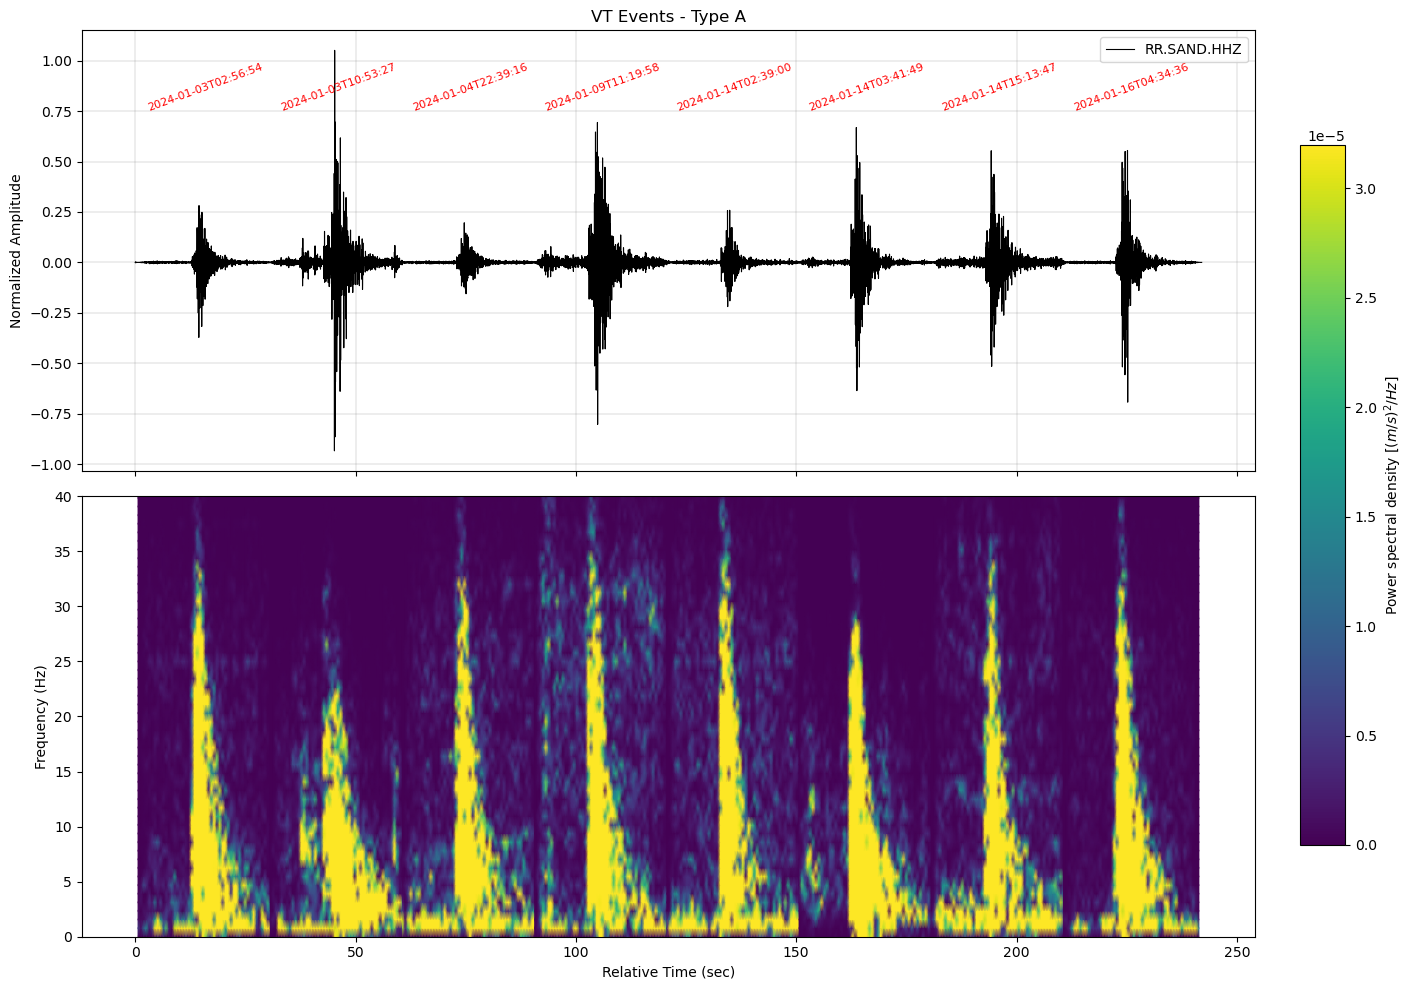

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

for index, event in enumerate(events):
    pcm = process_and_plot_A(event, data_dir, inventory_file, ax1, ax2, index)
    
ax1.legend([f'{stZ[0].stats.network}.{stZ[0].stats.station}.{stZ[0].stats.channel}'], fontsize=10)

fig.tight_layout(rect=[0, 0, 0.85, 1])

cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7])
fig.colorbar(pcm, cax=cbar_ax, label=r'Power spectral density $[(m/s)^2/Hz]$')

plt.show()
save_name = 'VT_typeA_examples' + '.png'
fig.savefig("../figures/" + save_name)

In [5]:
events = [
    "2024-01-03T11:02:16",
    "2024-01-04T19:59:50",
    "2024-01-14T01:10:14",
    "2024-01-14T02:50:18",
    "2024-01-14T03:13:15",
    "2024-01-14T07:51:18",
    "2024-01-14T08:00:57",
    "2024-01-14T19:58:29"
]

In [6]:
# Function to process and plot data - type B VT events
def process_and_plot_B(event_time, data_dir, inventory_file, ax1, ax2, event_index):
    tstart = UTCDateTime(event_time)
    day_of_year = tstart.julday
    file_path = os.path.join(data_dir, f"RR.SAND.00.HHZ.D.2024.{day_of_year:03d}")

    st = read(file_path)
    st.trim(tstart - 2, tstart + 30)
    st.detrend('demean')
    st.detrend('linear')
    st.taper(0.1)
    st.remove_response(inventory=inventory_file, output="VEL")
    st.normalize(global_max=True)

    stcopy = st.copy()
    stcopy.filter("bandpass", freqmin=1.0, freqmax=10.0)

    stcopy_freq = st.copy()
    stcopy_freq.filter("bandpass", freqmin=1.0, freqmax=30.0)

    # Pre-process the data
    tr = stcopy[0]
    tr_freq = stcopy_freq[0]
    fs = tr.stats.sampling_rate
    signal = tr.data
    signal_freq = tr_freq.data
    t = np.arange(0, len(signal) / fs, 1 / fs)

    # Calculate spectrogram
    frequencies, times, Sxx = spectrogram(signal_freq, fs, nperseg=256, noverlap=128)

    # Plot waveform
    offset = len(ax1.lines) * 30
    ax1.plot(t + offset, signal, 'k-', linewidth=0.8)
    ax1.text(t[len(t)//2] + offset, 0.68, event_time, ha='center', fontsize=8, color = 'r', rotation = 20)
    ax1.set_ylabel('Normalized Amplitude')
    ax1.set_title('VT Events - Type B')
    ax1.tick_params(axis='both', which='minor', labelsize=9)
    ax1.grid(color='gray', linestyle='-', linewidth=0.2)
    
    # Calculate vmax for better visualization
    vmax = np.percentile(Sxx, 95)

    # Plot spectrogram with adjusted vmax
    pcm = ax2.pcolormesh(times + offset, frequencies, Sxx, shading='gouraud', cmap='viridis', vmax=vmax)
    ax2.set_ylabel('Frequency (Hz)')
    ax2.set_xlabel('Relative Time (sec)')
    ax2.set_ylim(0, 40)
    return pcm

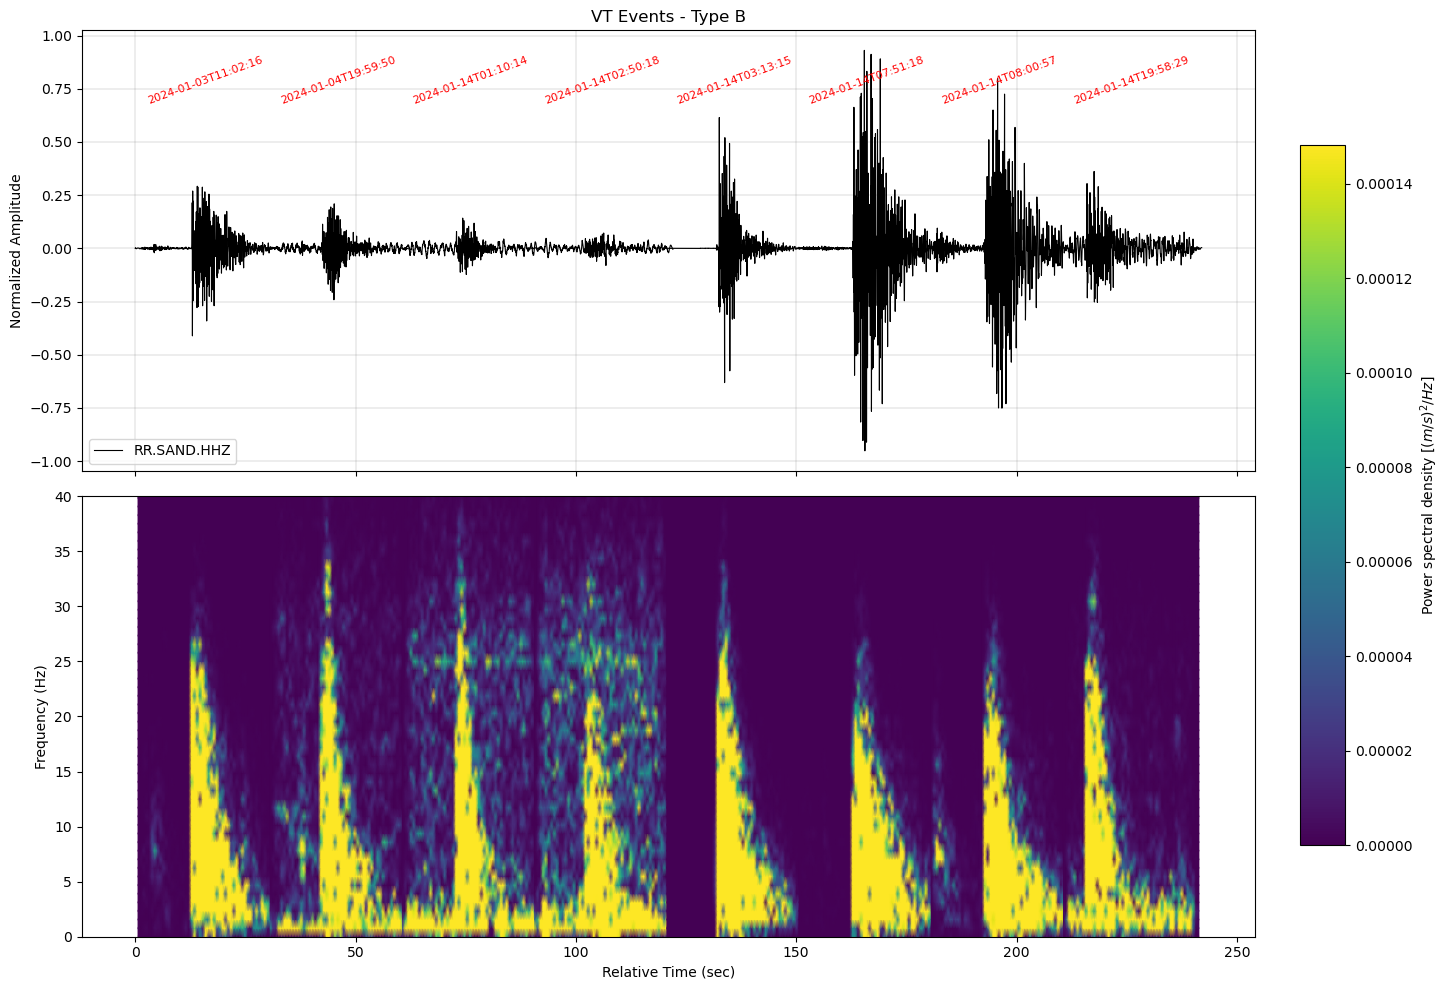

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

for index, event in enumerate(events):
    pcm = process_and_plot_B(event, data_dir, inventory_file, ax1, ax2, index)
    
ax1.legend([f'{stZ[0].stats.network}.{stZ[0].stats.station}.{stZ[0].stats.channel}'], fontsize=10, loc = 'lower left')

fig.tight_layout(rect=[0, 0, 0.85, 1])

cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7])
fig.colorbar(pcm, cax=cbar_ax, label=r'Power spectral density $[(m/s)^2/Hz]$')

plt.show()
save_name = 'VT_typeB_examples' + '.png'
fig.savefig("../figures/" + save_name)